In [65]:
import tensorflow as tf
import keras
from keras.utils import np_utils
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

In [66]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [67]:
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [68]:
# Checking the number of unique classes 
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [69]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

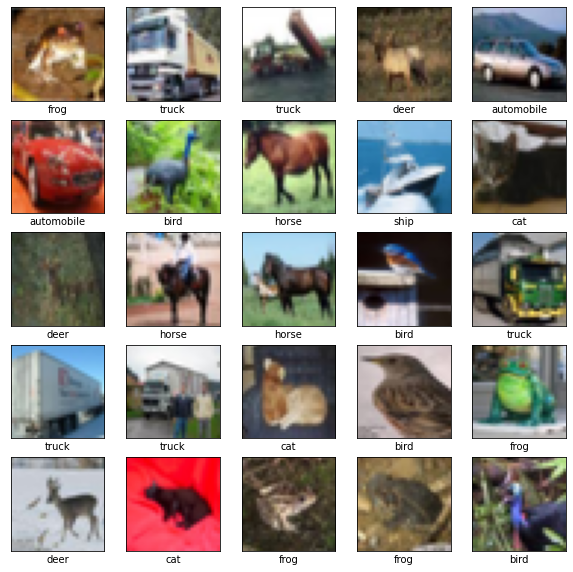

In [70]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [7]:
X_train = train_images.astype('float32')
X_test = test_images.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
y_train = np_utils.to_categorical(train_labels, 10)
y_test = np_utils.to_categorical(test_labels, 10)

Neural Network

In [25]:
x_train1 = train_images
x_test1 = test_images
y_train1 = train_labels
y_test1 = test_labels

In [26]:
x_train1 = x_train1 / 255.0
x_test1 = x_test1 / 255.0
y_train1 = y_train1.reshape(-1,)
y_test1 = y_test1.reshape(-1,)
print(y_test1[:5])

[3 8 8 0 6]


In [18]:
nn = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(2048, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [19]:
nn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               1573376   
                                                                 
 dense_11 (Dense)            (None, 1024)              525312    
                                                                 
 dense_12 (Dense)            (None, 2048)              2099200   
                                                                 
 dense_13 (Dense)            (None, 4096)              8392704   
                                                                 
 dense_14 (Dense)            (None, 10)                40970     
                                                                 
Total params: 12,631,562
Trainable params: 12,631,562


In [71]:
nn_model = nn.fit(x_train1, y_train1, validation_data=(x_test1, y_test1),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5208 - accuracy: 0.4553 - val_loss: 1.5664 - val_accuracy: 0.4375
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5053 - accuracy: 0.4586 - val_loss: 1.5351 - val_accuracy: 0.4565
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4917 - accuracy: 0.4619 - val_loss: 1.5829 - val_accuracy: 0.4305
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4703 - accuracy: 0.4680 - val_loss: 1.5906 - val_accuracy: 0.4413
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4592 - accuracy: 0.4732 - val_loss: 1.5305 - val_accuracy: 0.4564
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4485 - accuracy: 0.4768 - val_loss: 1.5266 - val_accuracy: 0.4580
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4354 - accuracy: 0.4804 - val_loss: 1.5324 - val_accuracy:

In [72]:
y_pred_nn = nn.predict(x_test1)
y_pred_classes = [np.argmax(element) for element in y_pred_nn]


print("Classification Report: \n", classification_report(y_test1, y_pred_classes))

pred_class_NN = np.argmax(y_pred_nn, axis=1)

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.46      0.53      1000
           1       0.60      0.54      0.57      1000
           2       0.36      0.31      0.33      1000
           3       0.27      0.33      0.30      1000
           4       0.39      0.38      0.38      1000
           5       0.39      0.31      0.35      1000
           6       0.45      0.54      0.49      1000
           7       0.49      0.49      0.49      1000
           8       0.60      0.59      0.59      1000
           9       0.46      0.62      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000



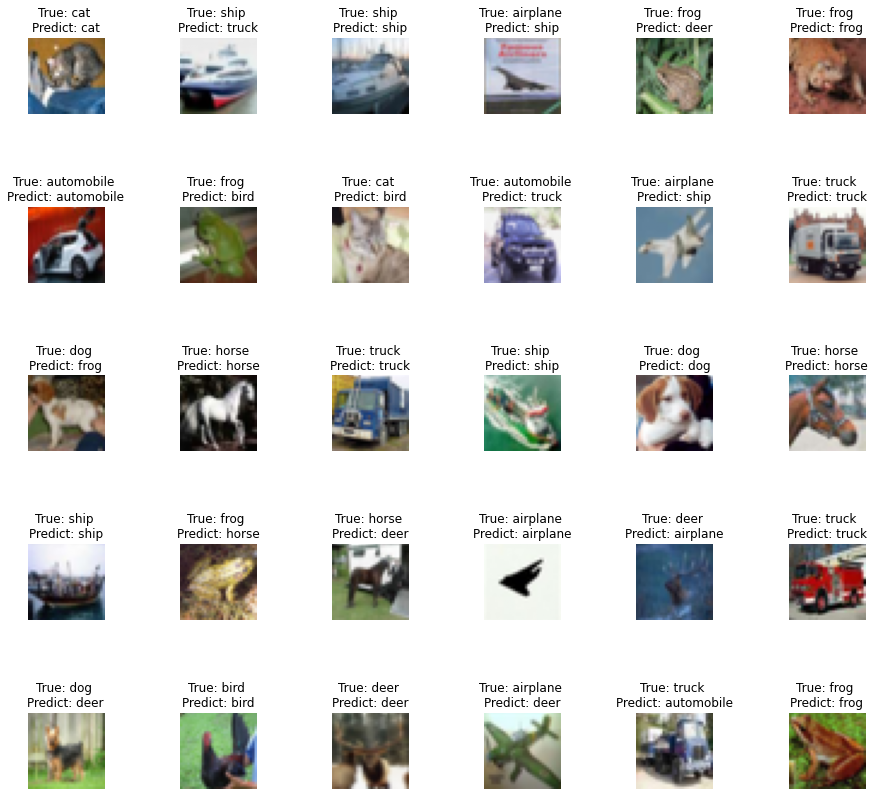

In [73]:
fig, axes = plt.subplots(5, 6, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 30):
    axes[i].imshow(x_test1[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[y_test1[i]], class_names[y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [74]:
cm_NN = confusion_matrix(y_pred_classes, y_test1)
print(f"Confusion matrix for the Neural Network classifier:\n{cm_NN}")

Confusion matrix for the Neural Network classifier:
[[455  20  71  14  25  16   5  20  68  22]
 [ 33 544  27  21   9  22  23  28  57 141]
 [ 53  22 306  86 147  81  74  65  14   7]
 [ 85  37 114 328  99 233 115  99  61  46]
 [ 38  11 146  52 379  76 121 117  30  11]
 [ 21  15  67 185  36 314  61  61  20  20]
 [ 23  16 124 158 142 116 541  35   9  33]
 [ 43  39  85  69 103  89  21 491  15  43]
 [150  57  30  25  25  24   9  18 589  60]
 [ 99 239  30  62  35  29  30  66 137 617]]


Text(0.5, 1.0, 'Loss Curves')

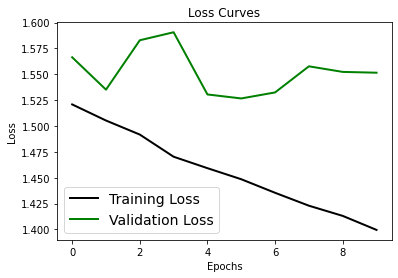

In [77]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(nn_model.history['loss'], 'black', linewidth=2.0)
plt.plot(nn_model.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

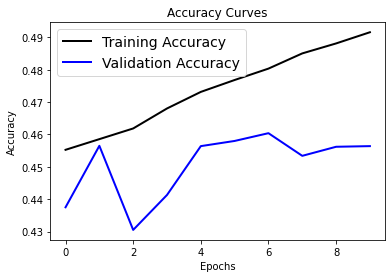

In [78]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(nn_model.history['accuracy'], 'black', linewidth=2.0)
plt.plot(nn_model.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

CNN CLASSIFIER

In [36]:
cnn = models.Sequential()

In [37]:
cnn.add(layers.Conv2D(filters=16, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(filters=16, kernel_size=3,activation='relu', padding='same'))
cnn.add(layers.MaxPool2D(pool_size=2))

cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
cnn.add(layers.MaxPool2D(pool_size=2))

cnn.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
cnn.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
cnn.add(layers.MaxPool2D(pool_size=2))

cnn.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
cnn.add(layers.MaxPool2D(pool_size=2))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(256, activation='relu'))
cnn.add(layers.Dropout(rate=0.25))
cnn.add(layers.Dense(512, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

#compiling our model
cnn.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [38]:
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6029 - accuracy: 0.3959 - val_loss: 1.2933 - val_accuracy: 0.5270
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2046 - accuracy: 0.5695 - val_loss: 1.1251 - val_accuracy: 0.6028
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0169 - accuracy: 0.6404 - val_loss: 1.0759 - val_accuracy: 0.6279
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9060 - accuracy: 0.6812 - val_loss: 0.9619 - val_accuracy: 0.6715
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8143 - accuracy: 0.7167 - val_loss: 0.9414 - val_accuracy: 0.6682
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7481 - accuracy: 0.7390 - val_loss: 0.8719 - val_accuracy: 0.7019
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6937 - accuracy: 0.7569 - val_loss: 0.8833 - val_accu

In [39]:
y_pred_c = cnn.predict(X_test)
print(y_pred_c)

y_pred_classes_c = np.argmax(y_pred_c, axis=1)
print(y_pred_classes_c)


[[1.1127549e-02 6.4617624e-03 2.4016513e-02 ... 4.1352375e-03
  1.5620646e-02 8.4361620e-03]
 [2.8946900e-04 9.6280694e-02 1.7347811e-07 ... 6.1798795e-12
  9.0342176e-01 7.5985413e-06]
 [1.5717605e-01 3.5419406e-03 3.2156941e-03 ... 7.8649493e-05
  8.3281434e-01 2.4495756e-03]
 ...
 [2.3864125e-06 4.7939253e-08 4.5951992e-02 ... 6.5912935e-03
  7.8359086e-08 7.7360696e-08]
 [1.2849234e-01 7.5483763e-01 7.7920803e-04 ... 5.7747849e-04
  9.1031760e-02 5.6227511e-03]
 [3.5300149e-10 2.4486923e-11 1.8255026e-06 ... 9.7324973e-01
  1.3628861e-12 2.2868027e-11]]
[3 8 8 ... 5 1 7]


In [40]:
rounded_labels_c = np.argmax(y_test, axis=1)

cm_c = confusion_matrix(rounded_labels_c, y_pred_classes_c)
print(f"Confusion matrix for CNN Clasifier:\n{cm_c}")

Confusion matrix for CNN Clasifier:
[[725  15  44  12  15   6   1  10 127  45]
 [ 13 881   0   5   0   5   5   2  21  68]
 [ 67  10 625  48  79  89  26  16  29  11]
 [ 29  10  71 520  50 207  23  31  29  30]
 [ 20   6  82  74 661  51  20  64  18   4]
 [  9   7  57 131  26 693  15  33  15  14]
 [ 11  14  74  93  53  44 658   5  30  18]
 [ 16   7  39  28  54  78   2 742   5  29]
 [ 26  29   5  10   5   5   0   3 895  22]
 [ 19  79   3  12   1   5   1   4  22 854]]


In [41]:
y_pred_classes_c = [np.argmax(element) for element in y_pred_c]

print("Classification Report: \n", classification_report(rounded_labels_c, y_pred_classes_c))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1000
           1       0.83      0.88      0.86      1000
           2       0.62      0.62      0.62      1000
           3       0.56      0.52      0.54      1000
           4       0.70      0.66      0.68      1000
           5       0.59      0.69      0.63      1000
           6       0.88      0.66      0.75      1000
           7       0.82      0.74      0.78      1000
           8       0.75      0.90      0.82      1000
           9       0.78      0.85      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



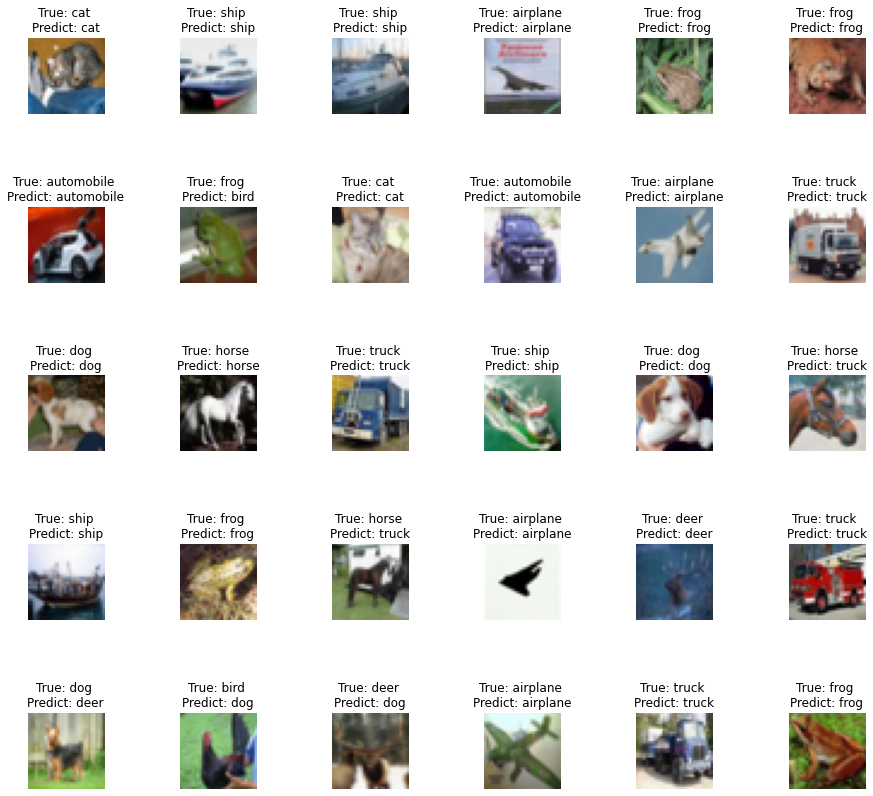

In [42]:
fig, axes = plt.subplots(5, 6, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 30):
    axes[i].imshow(x_test1[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[y_test1[i]], class_names[y_pred_classes_c[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

Text(0.5, 1.0, 'Loss Curves')

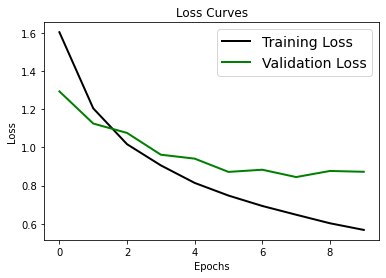

In [79]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

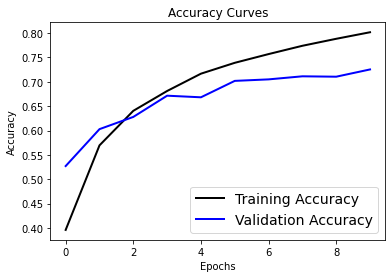

In [80]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

KNN CLASSIFIER

In [81]:
knn = KNeighborsClassifier(n_neighbors=5,algorithm='brute')

In [82]:
x_train_k = np.reshape(X_train,(X_train.shape[0],-1))
x_test_k = np.reshape(X_test,(X_test.shape[0],-1))
y_train_k = np.argmax(y_train,axis=1)
y_test_k = np.argmax(y_test,axis=1)

In [83]:
knn=knn.fit(x_train_k,y_train_k)

In [88]:
y_pred_knn = knn.predict(x_test_k)
print(y_pred_knn)

[2 8 8 ... 5 6 4]


In [89]:
score_k = knn.score(x_test_k,y_test_k)
print(f"Test set accuracy KNN model: {score_k}%")

Test set accuracy KNN model: 0.3398%


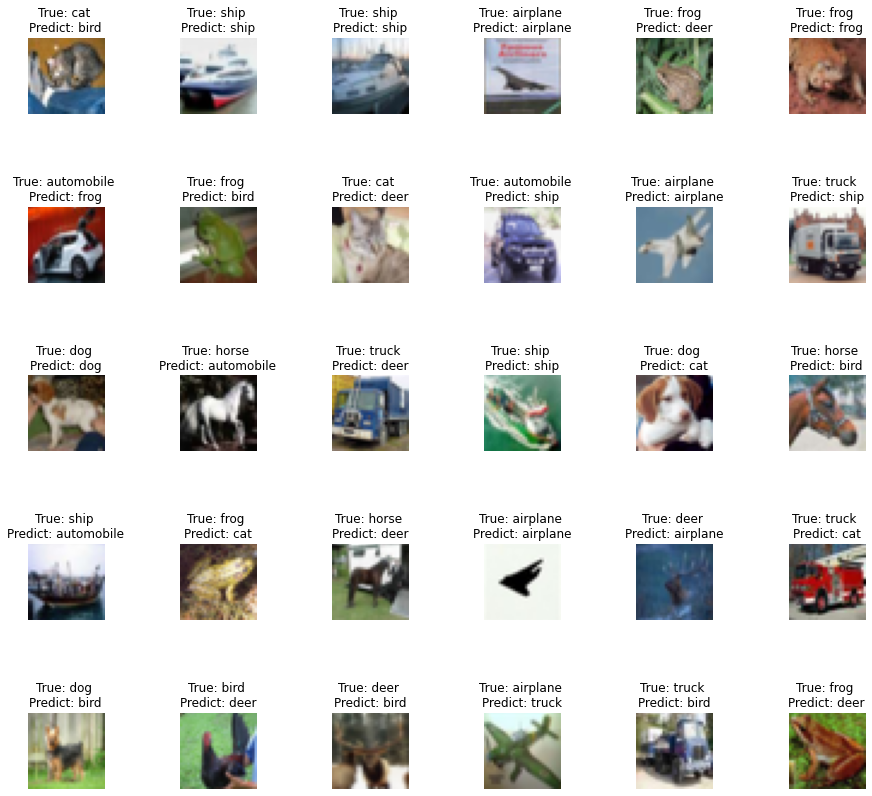

In [90]:
# Plotting the Actual vs. Predicted results (for KNN Model)

fig, axes = plt.subplots(5, 6, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 30):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[y_pred_knn[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [91]:
knn_cm = confusion_matrix(y_test_k, y_pred_knn)
print(f"The confusion matrix for the KNN model is:\n{knn_cm}")

The confusion matrix for the KNN model is:
[[537   4 117  13  59   7  26   5 225   7]
 [139 205 110  42 155  36  61  10 217  25]
 [107   3 452  52 226  34  66   8  49   3]
 [ 70   8 234 217 193 115  95  17  46   5]
 [ 64   1 262  35 514  21  41   7  53   2]
 [ 71   3 227 155 187 220  66  14  51   6]
 [ 27   2 273  68 314  37 248   2  28   1]
 [ 93  10 181  50 280  52  53 210  67   4]
 [141  14  52  38  54  16  14   8 655   8]
 [153  67  98  68 124  23  46  29 252 140]]


LOGISTIC REGRESSION

In [93]:
x_train_l = np.reshape(X_train,(X_train.shape[0],-1))
X_test_l = np.reshape(X_test,(X_test.shape[0],-1))
y_train_l = np.argmax(y_train,axis=1)
y_test_l = np.argmax(y_test,axis=1)

In [52]:
logr = LogisticRegression(solver='lbfgs')

In [53]:
hist = logr.fit(x_train_l, y_train_l)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [54]:
y_pred_l = logr.predict(X_test_l) 
print(y_pred_l)

[3 9 8 ... 5 5 7]


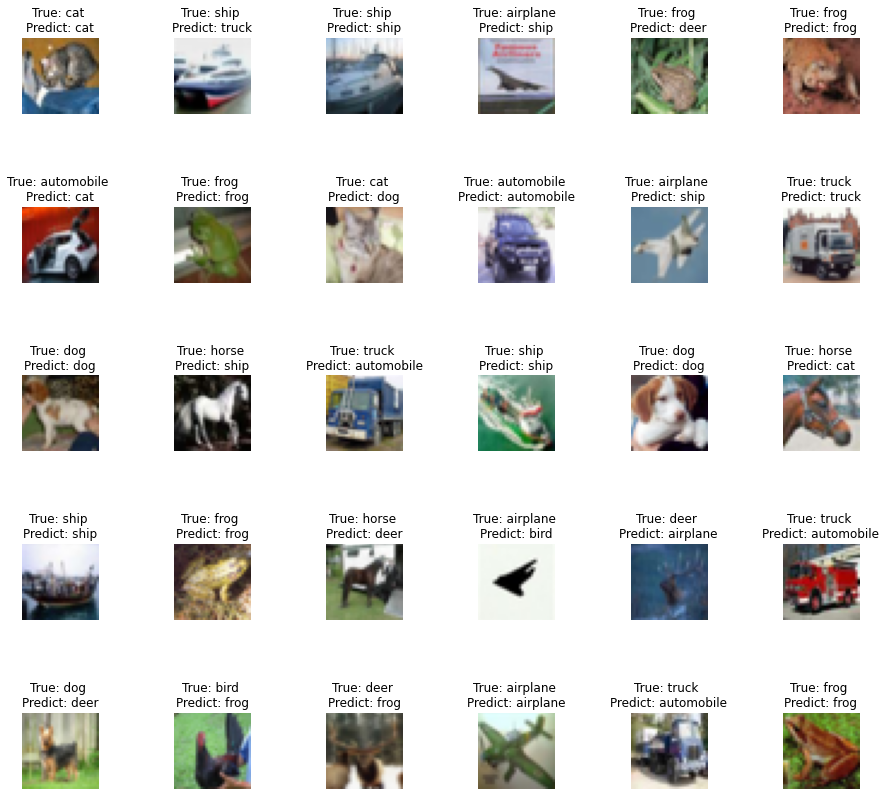

In [55]:
fig, axes = plt.subplots(5, 6, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 30):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[y_pred_l[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [56]:
rounded_y = np.argmax(y_test, axis=1)
cm_logr = confusion_matrix(rounded_y, y_pred_l)
print(f"The confusion matrix for the Logistic Regression model is:\n{cm_logr}")

The confusion matrix for the Logistic Regression model is:
[[479  42  59  30  19  38  26  53 184  70]
 [ 60 494  21  28  22  41  37  53  78 166]
 [112  47 276  80 115  93 138  67  48  24]
 [ 42  60  96 235  56 218 127  48  45  73]
 [ 57  28 135  47 291 106 158 121  32  25]
 [ 42  44  91 136  81 372  88  72  41  33]
 [ 15  34  73 107  98  95 489  39  23  27]
 [ 49  44  72  48  90  85  48 444  42  78]
 [184  67  20  20   9  53   8  19 515 105]
 [ 83 190  20  20  17  31  41  48  94 456]]


In [57]:
logr_score = logr.score(X_test_l,rounded_y)
print(f"Accuracy on test set for logistic regression model: {logr_score}%")

Accuracy on test set for logistic regression model: 0.4051%
